In [32]:

import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 폰트 설정 방법 2
import matplotlib as plt
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error


In [33]:
# 전처리 된 일반의류 데이터

df = pd.read_csv('./myungdong_cloth_after.csv', encoding = 'cp949')

In [34]:
# 결과 확인

df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,0,2015,1,CS300011,1.00,1.00,0.50,0.90,4,0.82,...,0.78,0.74,0.75,0.73,0.80,0.75,0.73,0.67,0.73,0.39
1,1,2015,2,CS300011,0.96,0.96,0.50,0.60,2,0.33,...,0.90,0.92,0.89,0.90,0.80,0.89,0.97,0.85,0.91,0.57
2,2,2015,3,CS300011,0.86,0.86,0.50,0.70,3,0.70,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67
3,3,2015,4,CS300011,0.84,0.84,0.50,0.70,2,0.33,...,0.70,0.76,0.71,0.69,0.87,0.69,0.66,0.74,0.69,0.42
4,4,2016,1,CS300011,0.75,0.75,0.50,0.70,3,0.64,...,0.64,0.60,0.57,0.63,0.69,0.62,0.57,0.55,0.61,0.42


In [35]:
# 결과 확인

df.shape

(22, 82)

In [36]:
# 결측치 확인

df.isnull().sum()

Unnamed: 0         0
기준_년_코드            0
기준_분기_코드           0
서비스_업종_코드          0
점포_수               0
                  ..
연령대_20_매출_건수       0
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
Length: 82, dtype: int64

In [37]:
# 전체 결측치 확인

all_null = df.isnull().sum()
all_null.sum()

0

In [38]:
# 모든 column 출력

df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율',
       '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매

In [76]:
df_new = df[['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '폐업_률']]

In [77]:
oo = df_new.iloc[20,:]
df_new = df_new.drop(20)
df_new = df_new.append(oo)
df_new = df_new.reset_index(drop = True)
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,폐업_률
0,2015,1,CS300011,0.00,0.00,0.00,0.60,1.00,0.86,4
1,2015,2,CS300011,0.00,0.00,0.57,0.00,0.83,1.00,2
2,2015,3,CS300011,0.00,0.00,0.71,0.00,0.50,0.86,3
3,2015,4,CS300011,0.00,0.00,0.43,0.80,0.50,0.86,2
4,2016,1,CS300011,0.00,0.00,0.43,0.80,0.50,0.71,3
5,2016,2,CS300011,0.00,0.00,0.57,0.40,0.50,0.86,1
6,2016,3,CS300011,0.00,0.00,0.71,0.00,0.33,1.00,4
7,2016,4,CS300011,0.00,0.00,0.57,0.60,0.17,1.00,2
8,2017,1,CS300011,0.00,0.00,0.43,1.00,0.33,0.71,5
9,2017,2,CS300011,0.00,0.00,0.86,0.80,0.00,0.71,3


In [78]:
y = df_new[['기준_년_코드', '기준_분기_코드', '폐업_률']]
y

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,4
1,2015,2,2
2,2015,3,3
3,2015,4,2
4,2016,1,3
5,2016,2,1
6,2016,3,4
7,2016,4,2
8,2017,1,5
9,2017,2,3


In [79]:
y = y.drop(0).reset_index(drop = True)

In [80]:
y_new = pd.DataFrame(columns = y.columns)

for i in range(len(y)):
    row = y.iloc[i]
    if row['기준_분기_코드'] != 1:
        row['기준_분기_코드'] -= 1
        y_new = y_new.append(row)
    else:
        row['기준_년_코드'] -= 1
        row['기준_분기_코드'] = 4
        y_new = y_new.append(row)

In [2]:
y_new

NameError: name 'y_new' is not defined

In [82]:
x_predict = pd.DataFrame(columns = df_new.columns)
x_predict = x_predict.append(df_new.iloc[21,:])
x_predict = x_predict.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '폐업_률'], axis = 1)

In [83]:
x_predict

,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율
21,0.00,0.00,1.00,0.60,0.83,0.00


In [84]:
x = df_new.drop('폐업_률', axis = 1).drop(21).reset_index(drop = True)
x

,기준_년_코드,기준_분기_코드,서비스_업종_코드,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율
0,2015,1,CS300011,0.00,0.00,0.00,0.60,1.00,0.86
1,2015,2,CS300011,0.00,0.00,0.57,0.00,0.83,1.00
2,2015,3,CS300011,0.00,0.00,0.71,0.00,0.50,0.86
3,2015,4,CS300011,0.00,0.00,0.43,0.80,0.50,0.86
4,2016,1,CS300011,0.00,0.00,0.43,0.80,0.50,0.71
5,2016,2,CS300011,0.00,0.00,0.57,0.40,0.50,0.86
6,2016,3,CS300011,0.00,0.00,0.71,0.00,0.33,1.00
7,2016,4,CS300011,0.00,0.00,0.57,0.60,0.17,1.00
8,2017,1,CS300011,0.00,0.00,0.43,1.00,0.33,0.71
9,2017,2,CS300011,0.00,0.00,0.86,0.80,0.00,0.71


In [85]:
xy_train = pd.merge(x, y_new, how = 'left', on = ['기준_년_코드', '기준_분기_코드'])

In [86]:
xy_train

,기준_년_코드,기준_분기_코드,서비스_업종_코드,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,폐업_률
0,2015,1,CS300011,0.00,0.00,0.00,0.60,1.00,0.86,2
1,2015,2,CS300011,0.00,0.00,0.57,0.00,0.83,1.00,3
2,2015,3,CS300011,0.00,0.00,0.71,0.00,0.50,0.86,2
3,2015,4,CS300011,0.00,0.00,0.43,0.80,0.50,0.86,3
4,2016,1,CS300011,0.00,0.00,0.43,0.80,0.50,0.71,1
5,2016,2,CS300011,0.00,0.00,0.57,0.40,0.50,0.86,4
6,2016,3,CS300011,0.00,0.00,0.71,0.00,0.33,1.00,2
7,2016,4,CS300011,0.00,0.00,0.57,0.60,0.17,1.00,5
8,2017,1,CS300011,0.00,0.00,0.43,1.00,0.33,0.71,3
9,2017,2,CS300011,0.00,0.00,0.86,0.80,0.00,0.71,2


In [87]:
xy_train_new = xy_train.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드'], axis = 1)

In [1]:
xy_train_new

NameError: name 'xy_train_new' is not defined

In [89]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장
from sklearn.metrics import accuracy_score

x_in = xy_train_new.drop('폐업_률', axis = 1)
x_out = xy_train_new['폐업_률']
total = 100
x_out = total - x_out

# train, test 데이터 
X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [90]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=12000, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:97.01154
[1]	validation_0-rmse:96.92170
[2]	validation_0-rmse:96.83066
[3]	validation_0-rmse:96.74098
[4]	validation_0-rmse:96.65093
[5]	validation_0-rmse:96.56246
[6]	validation_0-rmse:96.47311
[7]	validation_0-rmse:96.38284
[8]	validation_0-rmse:96.29359
[9]	validation_0-rmse:96.20495
[10]	validation_0-rmse:96.11492
[11]	validation_0-rmse:96.02653
[12]	validation_0-rmse:95.93660
[13]	validation_0-rmse:95.84847
[14]	validation_0-rmse:95.75854
[15]	validation_0-rmse:95.66823
[16]	validation_0-rmse:95.58283
[17]	validation_0-rmse:95.49655
[18]	validation_0-rmse:95.40865
[19]	validation_0-rmse:95.32091
[20]	validation_0-rmse:95.23270
[21]	validation_0-rmse:95.14324
[22]	validation_0-rmse:95.05591
[23]	validation_0-rmse:94.96819
[24]	validation_0-rmse:94.87985
[25]	validation_0-rmse:94.79242
[26]	validation_0-rmse:94.70358
[27]	validation_0-rmse:94.61548
[28]	validation_0-rmse:94.53017
[29]	validation_0-rmse:94.44231
[30]	validation_0-rmse:94.35460
[31]	validation_0-

[252]	validation_0-rmse:76.85886
[253]	validation_0-rmse:76.78932
[254]	validation_0-rmse:76.71748
[255]	validation_0-rmse:76.64564
[256]	validation_0-rmse:76.57502
[257]	validation_0-rmse:76.50504
[258]	validation_0-rmse:76.43540
[259]	validation_0-rmse:76.36413
[260]	validation_0-rmse:76.29343
[261]	validation_0-rmse:76.22243
[262]	validation_0-rmse:76.15171
[263]	validation_0-rmse:76.08076
[264]	validation_0-rmse:76.00959
[265]	validation_0-rmse:75.93988
[266]	validation_0-rmse:75.86871
[267]	validation_0-rmse:75.79838
[268]	validation_0-rmse:75.72806
[269]	validation_0-rmse:75.65817
[270]	validation_0-rmse:75.58732
[271]	validation_0-rmse:75.51691
[272]	validation_0-rmse:75.44849
[273]	validation_0-rmse:75.37999
[274]	validation_0-rmse:75.30907
[275]	validation_0-rmse:75.23862
[276]	validation_0-rmse:75.16928
[277]	validation_0-rmse:75.09946
[278]	validation_0-rmse:75.02992
[279]	validation_0-rmse:74.95965
[280]	validation_0-rmse:74.89099
[281]	validation_0-rmse:74.82353
[282]	vali

[501]	validation_0-rmse:61.05129
[502]	validation_0-rmse:60.99472
[503]	validation_0-rmse:60.93742
[504]	validation_0-rmse:60.88211
[505]	validation_0-rmse:60.82659
[506]	validation_0-rmse:60.76965
[507]	validation_0-rmse:60.71307
[508]	validation_0-rmse:60.65697
[509]	validation_0-rmse:60.60076
[510]	validation_0-rmse:60.54446
[511]	validation_0-rmse:60.48877
[512]	validation_0-rmse:60.43295
[513]	validation_0-rmse:60.37611
[514]	validation_0-rmse:60.32040
[515]	validation_0-rmse:60.26416
[516]	validation_0-rmse:60.20748
[517]	validation_0-rmse:60.15098
[518]	validation_0-rmse:60.09467
[519]	validation_0-rmse:60.03978
[520]	validation_0-rmse:59.98454
[521]	validation_0-rmse:59.92956
[522]	validation_0-rmse:59.87347
[523]	validation_0-rmse:59.81783
[524]	validation_0-rmse:59.76241
[525]	validation_0-rmse:59.70754
[526]	validation_0-rmse:59.65171
[527]	validation_0-rmse:59.59721
[528]	validation_0-rmse:59.54221
[529]	validation_0-rmse:59.48681
[530]	validation_0-rmse:59.43149
[531]	vali

[750]	validation_0-rmse:48.48498
[751]	validation_0-rmse:48.43928
[752]	validation_0-rmse:48.39390
[753]	validation_0-rmse:48.34925
[754]	validation_0-rmse:48.30419
[755]	validation_0-rmse:48.25940
[756]	validation_0-rmse:48.21488
[757]	validation_0-rmse:48.16981
[758]	validation_0-rmse:48.12504
[759]	validation_0-rmse:48.08028
[760]	validation_0-rmse:48.03530
[761]	validation_0-rmse:47.99115
[762]	validation_0-rmse:47.94780
[763]	validation_0-rmse:47.90295
[764]	validation_0-rmse:47.85876
[765]	validation_0-rmse:47.81385
[766]	validation_0-rmse:47.76958
[767]	validation_0-rmse:47.72462
[768]	validation_0-rmse:47.67964
[769]	validation_0-rmse:47.63573
[770]	validation_0-rmse:47.59187
[771]	validation_0-rmse:47.54715
[772]	validation_0-rmse:47.50264
[773]	validation_0-rmse:47.45882
[774]	validation_0-rmse:47.41479
[775]	validation_0-rmse:47.37170
[776]	validation_0-rmse:47.32845
[777]	validation_0-rmse:47.28440
[778]	validation_0-rmse:47.24102
[779]	validation_0-rmse:47.19721
[780]	vali

[999]	validation_0-rmse:38.48831
[1000]	validation_0-rmse:38.45226
[1001]	validation_0-rmse:38.41627
[1002]	validation_0-rmse:38.38095
[1003]	validation_0-rmse:38.34539
[1004]	validation_0-rmse:38.31118
[1005]	validation_0-rmse:38.27518
[1006]	validation_0-rmse:38.23980
[1007]	validation_0-rmse:38.20523
[1008]	validation_0-rmse:38.17088
[1009]	validation_0-rmse:38.13498
[1010]	validation_0-rmse:38.09942
[1011]	validation_0-rmse:38.06488
[1012]	validation_0-rmse:38.02954
[1013]	validation_0-rmse:37.99448
[1014]	validation_0-rmse:37.95885
[1015]	validation_0-rmse:37.92319
[1016]	validation_0-rmse:37.88756
[1017]	validation_0-rmse:37.85261
[1018]	validation_0-rmse:37.81746
[1019]	validation_0-rmse:37.78234
[1020]	validation_0-rmse:37.74689
[1021]	validation_0-rmse:37.71162
[1022]	validation_0-rmse:37.67630
[1023]	validation_0-rmse:37.64166
[1024]	validation_0-rmse:37.60735
[1025]	validation_0-rmse:37.57191
[1026]	validation_0-rmse:37.53753
[1027]	validation_0-rmse:37.50326
[1028]	validati

[1240]	validation_0-rmse:30.78036
[1241]	validation_0-rmse:30.75230
[1242]	validation_0-rmse:30.72334
[1243]	validation_0-rmse:30.69444
[1244]	validation_0-rmse:30.66618
[1245]	validation_0-rmse:30.63879
[1246]	validation_0-rmse:30.61012
[1247]	validation_0-rmse:30.58211
[1248]	validation_0-rmse:30.55397
[1249]	validation_0-rmse:30.52630
[1250]	validation_0-rmse:30.49812
[1251]	validation_0-rmse:30.47032
[1252]	validation_0-rmse:30.44211
[1253]	validation_0-rmse:30.41391
[1254]	validation_0-rmse:30.38559
[1255]	validation_0-rmse:30.35726
[1256]	validation_0-rmse:30.32941
[1257]	validation_0-rmse:30.30120
[1258]	validation_0-rmse:30.27366
[1259]	validation_0-rmse:30.24572
[1260]	validation_0-rmse:30.21767
[1261]	validation_0-rmse:30.18939
[1262]	validation_0-rmse:30.16254
[1263]	validation_0-rmse:30.13449
[1264]	validation_0-rmse:30.10758
[1265]	validation_0-rmse:30.07971
[1266]	validation_0-rmse:30.05166
[1267]	validation_0-rmse:30.02466
[1268]	validation_0-rmse:29.99739
[1269]	validat

[1481]	validation_0-rmse:24.61273
[1482]	validation_0-rmse:24.58981
[1483]	validation_0-rmse:24.56682
[1484]	validation_0-rmse:24.54379
[1485]	validation_0-rmse:24.52078
[1486]	validation_0-rmse:24.49764
[1487]	validation_0-rmse:24.47491
[1488]	validation_0-rmse:24.45184
[1489]	validation_0-rmse:24.42892
[1490]	validation_0-rmse:24.40674
[1491]	validation_0-rmse:24.38526
[1492]	validation_0-rmse:24.36296
[1493]	validation_0-rmse:24.34092
[1494]	validation_0-rmse:24.31831
[1495]	validation_0-rmse:24.29566
[1496]	validation_0-rmse:24.27358
[1497]	validation_0-rmse:24.25075
[1498]	validation_0-rmse:24.22817
[1499]	validation_0-rmse:24.20538
[1500]	validation_0-rmse:24.18334
[1501]	validation_0-rmse:24.16107
[1502]	validation_0-rmse:24.13889
[1503]	validation_0-rmse:24.11660
[1504]	validation_0-rmse:24.09413
[1505]	validation_0-rmse:24.07191
[1506]	validation_0-rmse:24.05028
[1507]	validation_0-rmse:24.02795
[1508]	validation_0-rmse:24.00557
[1509]	validation_0-rmse:23.98280
[1510]	validat

[1722]	validation_0-rmse:19.66708
[1723]	validation_0-rmse:19.64850
[1724]	validation_0-rmse:19.63031
[1725]	validation_0-rmse:19.61179
[1726]	validation_0-rmse:19.59322
[1727]	validation_0-rmse:19.57490
[1728]	validation_0-rmse:19.55678
[1729]	validation_0-rmse:19.53833
[1730]	validation_0-rmse:19.52023
[1731]	validation_0-rmse:19.50204
[1732]	validation_0-rmse:19.48359
[1733]	validation_0-rmse:19.46563
[1734]	validation_0-rmse:19.44731
[1735]	validation_0-rmse:19.42975
[1736]	validation_0-rmse:19.41153
[1737]	validation_0-rmse:19.39371
[1738]	validation_0-rmse:19.37558
[1739]	validation_0-rmse:19.35738
[1740]	validation_0-rmse:19.33900
[1741]	validation_0-rmse:19.32063
[1742]	validation_0-rmse:19.30240
[1743]	validation_0-rmse:19.28468
[1744]	validation_0-rmse:19.26675
[1745]	validation_0-rmse:19.24892
[1746]	validation_0-rmse:19.23064
[1747]	validation_0-rmse:19.21261
[1748]	validation_0-rmse:19.19481
[1749]	validation_0-rmse:19.17691
[1750]	validation_0-rmse:19.15885
[1751]	validat

[1963]	validation_0-rmse:15.70606
[1964]	validation_0-rmse:15.69126
[1965]	validation_0-rmse:15.67665
[1966]	validation_0-rmse:15.66173
[1967]	validation_0-rmse:15.64683
[1968]	validation_0-rmse:15.63235
[1969]	validation_0-rmse:15.61797
[1970]	validation_0-rmse:15.60343
[1971]	validation_0-rmse:15.58867
[1972]	validation_0-rmse:15.57437
[1973]	validation_0-rmse:15.55947
[1974]	validation_0-rmse:15.54494
[1975]	validation_0-rmse:15.53054
[1976]	validation_0-rmse:15.51598
[1977]	validation_0-rmse:15.50150
[1978]	validation_0-rmse:15.48691
[1979]	validation_0-rmse:15.47238
[1980]	validation_0-rmse:15.45790
[1981]	validation_0-rmse:15.44319
[1982]	validation_0-rmse:15.42889
[1983]	validation_0-rmse:15.41431
[1984]	validation_0-rmse:15.39943
[1985]	validation_0-rmse:15.38509
[1986]	validation_0-rmse:15.37069
[1987]	validation_0-rmse:15.35620
[1988]	validation_0-rmse:15.34156
[1989]	validation_0-rmse:15.32689
[1990]	validation_0-rmse:15.31235
[1991]	validation_0-rmse:15.29813
[1992]	validat

[2204]	validation_0-rmse:12.53900
[2205]	validation_0-rmse:12.52708
[2206]	validation_0-rmse:12.51523
[2207]	validation_0-rmse:12.50353
[2208]	validation_0-rmse:12.49171
[2209]	validation_0-rmse:12.47990
[2210]	validation_0-rmse:12.46788
[2211]	validation_0-rmse:12.45616
[2212]	validation_0-rmse:12.44439
[2213]	validation_0-rmse:12.43255
[2214]	validation_0-rmse:12.42065
[2215]	validation_0-rmse:12.40898
[2216]	validation_0-rmse:12.39733
[2217]	validation_0-rmse:12.38561
[2218]	validation_0-rmse:12.37405
[2219]	validation_0-rmse:12.36221
[2220]	validation_0-rmse:12.35038
[2221]	validation_0-rmse:12.33917
[2222]	validation_0-rmse:12.32758
[2223]	validation_0-rmse:12.31592
[2224]	validation_0-rmse:12.30447
[2225]	validation_0-rmse:12.29268
[2226]	validation_0-rmse:12.28114
[2227]	validation_0-rmse:12.26938
[2228]	validation_0-rmse:12.25763
[2229]	validation_0-rmse:12.24619
[2230]	validation_0-rmse:12.23470
[2231]	validation_0-rmse:12.22299
[2232]	validation_0-rmse:12.21162
[2233]	validat

[2445]	validation_0-rmse:10.00164
[2446]	validation_0-rmse:9.99223
[2447]	validation_0-rmse:9.98322
[2448]	validation_0-rmse:9.97406
[2449]	validation_0-rmse:9.96467
[2450]	validation_0-rmse:9.95520
[2451]	validation_0-rmse:9.94608
[2452]	validation_0-rmse:9.93658
[2453]	validation_0-rmse:9.92714
[2454]	validation_0-rmse:9.91765
[2455]	validation_0-rmse:9.90830
[2456]	validation_0-rmse:9.89904
[2457]	validation_0-rmse:9.88996
[2458]	validation_0-rmse:9.88064
[2459]	validation_0-rmse:9.87100
[2460]	validation_0-rmse:9.86152
[2461]	validation_0-rmse:9.85223
[2462]	validation_0-rmse:9.84279
[2463]	validation_0-rmse:9.83345
[2464]	validation_0-rmse:9.82443
[2465]	validation_0-rmse:9.81524
[2466]	validation_0-rmse:9.80607
[2467]	validation_0-rmse:9.79683
[2468]	validation_0-rmse:9.78775
[2469]	validation_0-rmse:9.77871
[2470]	validation_0-rmse:9.76935
[2471]	validation_0-rmse:9.76014
[2472]	validation_0-rmse:9.75095
[2473]	validation_0-rmse:9.74193
[2474]	validation_0-rmse:9.73247
[2475]	va

[2694]	validation_0-rmse:7.91002
[2695]	validation_0-rmse:7.90245
[2696]	validation_0-rmse:7.89489
[2697]	validation_0-rmse:7.88714
[2698]	validation_0-rmse:7.87963
[2699]	validation_0-rmse:7.87216
[2700]	validation_0-rmse:7.86472
[2701]	validation_0-rmse:7.85714
[2702]	validation_0-rmse:7.85001
[2703]	validation_0-rmse:7.84272
[2704]	validation_0-rmse:7.83519
[2705]	validation_0-rmse:7.82762
[2706]	validation_0-rmse:7.82035
[2707]	validation_0-rmse:7.81309
[2708]	validation_0-rmse:7.80585
[2709]	validation_0-rmse:7.79842
[2710]	validation_0-rmse:7.79099
[2711]	validation_0-rmse:7.78330
[2712]	validation_0-rmse:7.77547
[2713]	validation_0-rmse:7.76795
[2714]	validation_0-rmse:7.76068
[2715]	validation_0-rmse:7.75323
[2716]	validation_0-rmse:7.74620
[2717]	validation_0-rmse:7.73893
[2718]	validation_0-rmse:7.73191
[2719]	validation_0-rmse:7.72453
[2720]	validation_0-rmse:7.71723
[2721]	validation_0-rmse:7.71000
[2722]	validation_0-rmse:7.70278
[2723]	validation_0-rmse:7.69538
[2724]	val

[2943]	validation_0-rmse:6.24962
[2944]	validation_0-rmse:6.24378
[2945]	validation_0-rmse:6.23789
[2946]	validation_0-rmse:6.23212
[2947]	validation_0-rmse:6.22626
[2948]	validation_0-rmse:6.22024
[2949]	validation_0-rmse:6.21429
[2950]	validation_0-rmse:6.20887
[2951]	validation_0-rmse:6.20281
[2952]	validation_0-rmse:6.19691
[2953]	validation_0-rmse:6.19083
[2954]	validation_0-rmse:6.18503
[2955]	validation_0-rmse:6.17902
[2956]	validation_0-rmse:6.17328
[2957]	validation_0-rmse:6.16780
[2958]	validation_0-rmse:6.16185
[2959]	validation_0-rmse:6.15583
[2960]	validation_0-rmse:6.15010
[2961]	validation_0-rmse:6.14389
[2962]	validation_0-rmse:6.13789
[2963]	validation_0-rmse:6.13217
[2964]	validation_0-rmse:6.12695
[2965]	validation_0-rmse:6.12121
[2966]	validation_0-rmse:6.11526
[2967]	validation_0-rmse:6.10955
[2968]	validation_0-rmse:6.10373
[2969]	validation_0-rmse:6.09773
[2970]	validation_0-rmse:6.09206
[2971]	validation_0-rmse:6.08642
[2972]	validation_0-rmse:6.08063
[2973]	val

[3192]	validation_0-rmse:4.93979
[3193]	validation_0-rmse:4.93516
[3194]	validation_0-rmse:4.93036
[3195]	validation_0-rmse:4.92601
[3196]	validation_0-rmse:4.92106
[3197]	validation_0-rmse:4.91673
[3198]	validation_0-rmse:4.91207
[3199]	validation_0-rmse:4.90744
[3200]	validation_0-rmse:4.90284
[3201]	validation_0-rmse:4.89822
[3202]	validation_0-rmse:4.89337
[3203]	validation_0-rmse:4.88861
[3204]	validation_0-rmse:4.88392
[3205]	validation_0-rmse:4.87934
[3206]	validation_0-rmse:4.87484
[3207]	validation_0-rmse:4.86984
[3208]	validation_0-rmse:4.86521
[3209]	validation_0-rmse:4.86035
[3210]	validation_0-rmse:4.85569
[3211]	validation_0-rmse:4.85124
[3212]	validation_0-rmse:4.84651
[3213]	validation_0-rmse:4.84166
[3214]	validation_0-rmse:4.83715
[3215]	validation_0-rmse:4.83247
[3216]	validation_0-rmse:4.82773
[3217]	validation_0-rmse:4.82330
[3218]	validation_0-rmse:4.81871
[3219]	validation_0-rmse:4.81413
[3220]	validation_0-rmse:4.80948
[3221]	validation_0-rmse:4.80479
[3222]	val

[3441]	validation_0-rmse:3.89535
[3442]	validation_0-rmse:3.89153
[3443]	validation_0-rmse:3.88781
[3444]	validation_0-rmse:3.88430
[3445]	validation_0-rmse:3.88050
[3446]	validation_0-rmse:3.87647
[3447]	validation_0-rmse:3.87289
[3448]	validation_0-rmse:3.86926
[3449]	validation_0-rmse:3.86573
[3450]	validation_0-rmse:3.86200
[3451]	validation_0-rmse:3.85827
[3452]	validation_0-rmse:3.85478
[3453]	validation_0-rmse:3.85124
[3454]	validation_0-rmse:3.84806
[3455]	validation_0-rmse:3.84455
[3456]	validation_0-rmse:3.84092
[3457]	validation_0-rmse:3.83709
[3458]	validation_0-rmse:3.83324
[3459]	validation_0-rmse:3.82951
[3460]	validation_0-rmse:3.82566
[3461]	validation_0-rmse:3.82166
[3462]	validation_0-rmse:3.81805
[3463]	validation_0-rmse:3.81408
[3464]	validation_0-rmse:3.81040
[3465]	validation_0-rmse:3.80677
[3466]	validation_0-rmse:3.80374
[3467]	validation_0-rmse:3.80003
[3468]	validation_0-rmse:3.79637
[3469]	validation_0-rmse:3.79276
[3470]	validation_0-rmse:3.78905
[3471]	val

[3690]	validation_0-rmse:3.07442
[3691]	validation_0-rmse:3.07155
[3692]	validation_0-rmse:3.06869
[3693]	validation_0-rmse:3.06573
[3694]	validation_0-rmse:3.06276
[3695]	validation_0-rmse:3.05990
[3696]	validation_0-rmse:3.05673
[3697]	validation_0-rmse:3.05384
[3698]	validation_0-rmse:3.05088
[3699]	validation_0-rmse:3.04776
[3700]	validation_0-rmse:3.04494
[3701]	validation_0-rmse:3.04221
[3702]	validation_0-rmse:3.03919
[3703]	validation_0-rmse:3.03604
[3704]	validation_0-rmse:3.03327
[3705]	validation_0-rmse:3.03031
[3706]	validation_0-rmse:3.02760
[3707]	validation_0-rmse:3.02463
[3708]	validation_0-rmse:3.02177
[3709]	validation_0-rmse:3.01885
[3710]	validation_0-rmse:3.01604
[3711]	validation_0-rmse:3.01318
[3712]	validation_0-rmse:3.01046
[3713]	validation_0-rmse:3.00736
[3714]	validation_0-rmse:3.00444
[3715]	validation_0-rmse:3.00149
[3716]	validation_0-rmse:2.99853
[3717]	validation_0-rmse:2.99579
[3718]	validation_0-rmse:2.99288
[3719]	validation_0-rmse:2.99001
[3720]	val

[3939]	validation_0-rmse:2.43131
[3940]	validation_0-rmse:2.42906
[3941]	validation_0-rmse:2.42646
[3942]	validation_0-rmse:2.42433
[3943]	validation_0-rmse:2.42191
[3944]	validation_0-rmse:2.41954
[3945]	validation_0-rmse:2.41716
[3946]	validation_0-rmse:2.41470
[3947]	validation_0-rmse:2.41218
[3948]	validation_0-rmse:2.40979
[3949]	validation_0-rmse:2.40758
[3950]	validation_0-rmse:2.40500
[3951]	validation_0-rmse:2.40293
[3952]	validation_0-rmse:2.40069
[3953]	validation_0-rmse:2.39844
[3954]	validation_0-rmse:2.39649
[3955]	validation_0-rmse:2.39395
[3956]	validation_0-rmse:2.39174
[3957]	validation_0-rmse:2.38927
[3958]	validation_0-rmse:2.38719
[3959]	validation_0-rmse:2.38484
[3960]	validation_0-rmse:2.38267
[3961]	validation_0-rmse:2.38056
[3962]	validation_0-rmse:2.37838
[3963]	validation_0-rmse:2.37618
[3964]	validation_0-rmse:2.37418
[3965]	validation_0-rmse:2.37212
[3966]	validation_0-rmse:2.36965
[3967]	validation_0-rmse:2.36734
[3968]	validation_0-rmse:2.36520
[3969]	val

[4188]	validation_0-rmse:1.92370
[4189]	validation_0-rmse:1.92198
[4190]	validation_0-rmse:1.92040
[4191]	validation_0-rmse:1.91884
[4192]	validation_0-rmse:1.91701
[4193]	validation_0-rmse:1.91574
[4194]	validation_0-rmse:1.91390
[4195]	validation_0-rmse:1.91173
[4196]	validation_0-rmse:1.90975
[4197]	validation_0-rmse:1.90778
[4198]	validation_0-rmse:1.90581
[4199]	validation_0-rmse:1.90414
[4200]	validation_0-rmse:1.90231
[4201]	validation_0-rmse:1.90024
[4202]	validation_0-rmse:1.89825
[4203]	validation_0-rmse:1.89669
[4204]	validation_0-rmse:1.89503
[4205]	validation_0-rmse:1.89305
[4206]	validation_0-rmse:1.89130
[4207]	validation_0-rmse:1.88957
[4208]	validation_0-rmse:1.88777
[4209]	validation_0-rmse:1.88612
[4210]	validation_0-rmse:1.88401
[4211]	validation_0-rmse:1.88219
[4212]	validation_0-rmse:1.87991
[4213]	validation_0-rmse:1.87830
[4214]	validation_0-rmse:1.87631
[4215]	validation_0-rmse:1.87475
[4216]	validation_0-rmse:1.87271
[4217]	validation_0-rmse:1.87049
[4218]	val

[4437]	validation_0-rmse:1.54321
[4438]	validation_0-rmse:1.54161
[4439]	validation_0-rmse:1.54001
[4440]	validation_0-rmse:1.53885
[4441]	validation_0-rmse:1.53742
[4442]	validation_0-rmse:1.53568
[4443]	validation_0-rmse:1.53505
[4444]	validation_0-rmse:1.53359
[4445]	validation_0-rmse:1.53251
[4446]	validation_0-rmse:1.53093
[4447]	validation_0-rmse:1.52957
[4448]	validation_0-rmse:1.52820
[4449]	validation_0-rmse:1.52683
[4450]	validation_0-rmse:1.52545
[4451]	validation_0-rmse:1.52390
[4452]	validation_0-rmse:1.52248
[4453]	validation_0-rmse:1.52134
[4454]	validation_0-rmse:1.52041
[4455]	validation_0-rmse:1.51898
[4456]	validation_0-rmse:1.51775
[4457]	validation_0-rmse:1.51582
[4458]	validation_0-rmse:1.51487
[4459]	validation_0-rmse:1.51395
[4460]	validation_0-rmse:1.51250
[4461]	validation_0-rmse:1.51097
[4462]	validation_0-rmse:1.51033
[4463]	validation_0-rmse:1.50905
[4464]	validation_0-rmse:1.50845
[4465]	validation_0-rmse:1.50717
[4466]	validation_0-rmse:1.50592
[4467]	val

[4686]	validation_0-rmse:1.27963
[4687]	validation_0-rmse:1.27913
[4688]	validation_0-rmse:1.27793
[4689]	validation_0-rmse:1.27695
[4690]	validation_0-rmse:1.27676
[4691]	validation_0-rmse:1.27636
[4692]	validation_0-rmse:1.27555
[4693]	validation_0-rmse:1.27434
[4694]	validation_0-rmse:1.27342
[4695]	validation_0-rmse:1.27254
[4696]	validation_0-rmse:1.27204
[4697]	validation_0-rmse:1.27093
[4698]	validation_0-rmse:1.27010
[4699]	validation_0-rmse:1.26945
[4700]	validation_0-rmse:1.26848
[4701]	validation_0-rmse:1.26750
[4702]	validation_0-rmse:1.26638
[4703]	validation_0-rmse:1.26531
[4704]	validation_0-rmse:1.26430
[4705]	validation_0-rmse:1.26395
[4706]	validation_0-rmse:1.26355
[4707]	validation_0-rmse:1.26260
[4708]	validation_0-rmse:1.26140
[4709]	validation_0-rmse:1.26015
[4710]	validation_0-rmse:1.25895
[4711]	validation_0-rmse:1.25815
[4712]	validation_0-rmse:1.25738
[4713]	validation_0-rmse:1.25607
[4714]	validation_0-rmse:1.25498
[4715]	validation_0-rmse:1.25378
[4716]	val

[4935]	validation_0-rmse:1.09490
[4936]	validation_0-rmse:1.09431
[4937]	validation_0-rmse:1.09388
[4938]	validation_0-rmse:1.09289
[4939]	validation_0-rmse:1.09247
[4940]	validation_0-rmse:1.09220
[4941]	validation_0-rmse:1.09242
[4942]	validation_0-rmse:1.09171
[4943]	validation_0-rmse:1.09072
[4944]	validation_0-rmse:1.09059
[4945]	validation_0-rmse:1.08964
[4946]	validation_0-rmse:1.08931
[4947]	validation_0-rmse:1.08903
[4948]	validation_0-rmse:1.08873
[4949]	validation_0-rmse:1.08756
[4950]	validation_0-rmse:1.08749
[4951]	validation_0-rmse:1.08722
[4952]	validation_0-rmse:1.08694
[4953]	validation_0-rmse:1.08668
[4954]	validation_0-rmse:1.08578
[4955]	validation_0-rmse:1.08524
[4956]	validation_0-rmse:1.08452
[4957]	validation_0-rmse:1.08382
[4958]	validation_0-rmse:1.08298
[4959]	validation_0-rmse:1.08207
[4960]	validation_0-rmse:1.08166
[4961]	validation_0-rmse:1.08139
[4962]	validation_0-rmse:1.08133
[4963]	validation_0-rmse:1.08112
[4964]	validation_0-rmse:1.08070
[4965]	val

[5184]	validation_0-rmse:0.97236
[5185]	validation_0-rmse:0.97157
[5186]	validation_0-rmse:0.97150
[5187]	validation_0-rmse:0.97118
[5188]	validation_0-rmse:0.97045
[5189]	validation_0-rmse:0.96994
[5190]	validation_0-rmse:0.96920
[5191]	validation_0-rmse:0.96856
[5192]	validation_0-rmse:0.96783
[5193]	validation_0-rmse:0.96741
[5194]	validation_0-rmse:0.96675
[5195]	validation_0-rmse:0.96617
[5196]	validation_0-rmse:0.96554
[5197]	validation_0-rmse:0.96481
[5198]	validation_0-rmse:0.96475
[5199]	validation_0-rmse:0.96447
[5200]	validation_0-rmse:0.96441
[5201]	validation_0-rmse:0.96436
[5202]	validation_0-rmse:0.96448
[5203]	validation_0-rmse:0.96402
[5204]	validation_0-rmse:0.96410
[5205]	validation_0-rmse:0.96323
[5206]	validation_0-rmse:0.96265
[5207]	validation_0-rmse:0.96221
[5208]	validation_0-rmse:0.96203
[5209]	validation_0-rmse:0.96143
[5210]	validation_0-rmse:0.96081
[5211]	validation_0-rmse:0.96005
[5212]	validation_0-rmse:0.96013
[5213]	validation_0-rmse:0.95971
[5214]	val

[5433]	validation_0-rmse:0.90136
[5434]	validation_0-rmse:0.90134
[5435]	validation_0-rmse:0.90109
[5436]	validation_0-rmse:0.90127
[5437]	validation_0-rmse:0.90078
[5438]	validation_0-rmse:0.90045
[5439]	validation_0-rmse:0.90062
[5440]	validation_0-rmse:0.90072
[5441]	validation_0-rmse:0.90041
[5442]	validation_0-rmse:0.90063
[5443]	validation_0-rmse:0.90072
[5444]	validation_0-rmse:0.90021
[5445]	validation_0-rmse:0.90020
[5446]	validation_0-rmse:0.89942
[5447]	validation_0-rmse:0.89950
[5448]	validation_0-rmse:0.89922
[5449]	validation_0-rmse:0.89904
[5450]	validation_0-rmse:0.89826
[5451]	validation_0-rmse:0.89839
[5452]	validation_0-rmse:0.89772
[5453]	validation_0-rmse:0.89792
[5454]	validation_0-rmse:0.89815
[5455]	validation_0-rmse:0.89775
[5456]	validation_0-rmse:0.89782
[5457]	validation_0-rmse:0.89794
[5458]	validation_0-rmse:0.89754
[5459]	validation_0-rmse:0.89774
[5460]	validation_0-rmse:0.89779
[5461]	validation_0-rmse:0.89753
[5462]	validation_0-rmse:0.89772
[5463]	val

[5682]	validation_0-rmse:0.86435
[5683]	validation_0-rmse:0.86455
[5684]	validation_0-rmse:0.86459
[5685]	validation_0-rmse:0.86481
[5686]	validation_0-rmse:0.86497
[5687]	validation_0-rmse:0.86469
[5688]	validation_0-rmse:0.86475
[5689]	validation_0-rmse:0.86443
[5690]	validation_0-rmse:0.86404
[5691]	validation_0-rmse:0.86349
[5692]	validation_0-rmse:0.86365
[5693]	validation_0-rmse:0.86384
[5694]	validation_0-rmse:0.86401
[5695]	validation_0-rmse:0.86420
[5696]	validation_0-rmse:0.86394
[5697]	validation_0-rmse:0.86398
[5698]	validation_0-rmse:0.86396
[5699]	validation_0-rmse:0.86355
[5700]	validation_0-rmse:0.86329
[5701]	validation_0-rmse:0.86304
[5702]	validation_0-rmse:0.86252
[5703]	validation_0-rmse:0.86255
[5704]	validation_0-rmse:0.86277
[5705]	validation_0-rmse:0.86252
[5706]	validation_0-rmse:0.86225
[5707]	validation_0-rmse:0.86254
[5708]	validation_0-rmse:0.86262
[5709]	validation_0-rmse:0.86245
[5710]	validation_0-rmse:0.86234
[5711]	validation_0-rmse:0.86224
[5712]	val

[5931]	validation_0-rmse:0.84666
[5932]	validation_0-rmse:0.84683
[5933]	validation_0-rmse:0.84657
[5934]	validation_0-rmse:0.84629
[5935]	validation_0-rmse:0.84613
[5936]	validation_0-rmse:0.84648
[5937]	validation_0-rmse:0.84666
[5938]	validation_0-rmse:0.84648
[5939]	validation_0-rmse:0.84686
[5940]	validation_0-rmse:0.84651
[5941]	validation_0-rmse:0.84627
[5942]	validation_0-rmse:0.84622
[5943]	validation_0-rmse:0.84598
[5944]	validation_0-rmse:0.84573
[5945]	validation_0-rmse:0.84525
[5946]	validation_0-rmse:0.84526
[5947]	validation_0-rmse:0.84496
[5948]	validation_0-rmse:0.84446
[5949]	validation_0-rmse:0.84436
[5950]	validation_0-rmse:0.84454
[5951]	validation_0-rmse:0.84462
[5952]	validation_0-rmse:0.84442
[5953]	validation_0-rmse:0.84467
[5954]	validation_0-rmse:0.84446
[5955]	validation_0-rmse:0.84466
[5956]	validation_0-rmse:0.84441
[5957]	validation_0-rmse:0.84464
[5958]	validation_0-rmse:0.84487
[5959]	validation_0-rmse:0.84498
[5960]	validation_0-rmse:0.84492
[5961]	val

[6180]	validation_0-rmse:0.84507
[6181]	validation_0-rmse:0.84534
[6182]	validation_0-rmse:0.84494
[6183]	validation_0-rmse:0.84524
[6184]	validation_0-rmse:0.84505
[6185]	validation_0-rmse:0.84490
[6186]	validation_0-rmse:0.84518
[6187]	validation_0-rmse:0.84507
[6188]	validation_0-rmse:0.84517
[6189]	validation_0-rmse:0.84537
[6190]	validation_0-rmse:0.84572
[6191]	validation_0-rmse:0.84570
[6192]	validation_0-rmse:0.84589
[6193]	validation_0-rmse:0.84576
[6194]	validation_0-rmse:0.84604
[6195]	validation_0-rmse:0.84609
[6196]	validation_0-rmse:0.84612
[6197]	validation_0-rmse:0.84634
[6198]	validation_0-rmse:0.84606
[6199]	validation_0-rmse:0.84599
[6200]	validation_0-rmse:0.84597
[6201]	validation_0-rmse:0.84591
[6202]	validation_0-rmse:0.84628
[6203]	validation_0-rmse:0.84652
[6204]	validation_0-rmse:0.84638
[6205]	validation_0-rmse:0.84641
[6206]	validation_0-rmse:0.84669
[6207]	validation_0-rmse:0.84689
[6208]	validation_0-rmse:0.84714
[6209]	validation_0-rmse:0.84700
[6210]	val

[6429]	validation_0-rmse:0.85201
[6430]	validation_0-rmse:0.85189
[6431]	validation_0-rmse:0.85171
[6432]	validation_0-rmse:0.85181
[6433]	validation_0-rmse:0.85205
[6434]	validation_0-rmse:0.85207
[6435]	validation_0-rmse:0.85239
[6436]	validation_0-rmse:0.85265
[6437]	validation_0-rmse:0.85248
[6438]	validation_0-rmse:0.85238
[6439]	validation_0-rmse:0.85245
[6440]	validation_0-rmse:0.85235
[6441]	validation_0-rmse:0.85235
[6442]	validation_0-rmse:0.85219
[6443]	validation_0-rmse:0.85194
[6444]	validation_0-rmse:0.85224
[6445]	validation_0-rmse:0.85237
[6446]	validation_0-rmse:0.85254
[6447]	validation_0-rmse:0.85271
[6448]	validation_0-rmse:0.85299
[6449]	validation_0-rmse:0.85291
[6450]	validation_0-rmse:0.85275
[6451]	validation_0-rmse:0.85297
[6452]	validation_0-rmse:0.85294
[6453]	validation_0-rmse:0.85284
[6454]	validation_0-rmse:0.85317
[6455]	validation_0-rmse:0.85337
[6456]	validation_0-rmse:0.85325
[6457]	validation_0-rmse:0.85335
[6458]	validation_0-rmse:0.85366
[6459]	val

[6678]	validation_0-rmse:0.85957
[6679]	validation_0-rmse:0.85950
[6680]	validation_0-rmse:0.85948
[6681]	validation_0-rmse:0.85985
[6682]	validation_0-rmse:0.85996
[6683]	validation_0-rmse:0.85991
[6684]	validation_0-rmse:0.86011
[6685]	validation_0-rmse:0.86044
[6686]	validation_0-rmse:0.86065
[6687]	validation_0-rmse:0.86060
[6688]	validation_0-rmse:0.86087
[6689]	validation_0-rmse:0.86103
[6690]	validation_0-rmse:0.86087
[6691]	validation_0-rmse:0.86078
[6692]	validation_0-rmse:0.86100
[6693]	validation_0-rmse:0.86112
[6694]	validation_0-rmse:0.86141
[6695]	validation_0-rmse:0.86155
[6696]	validation_0-rmse:0.86124
[6697]	validation_0-rmse:0.86147
[6698]	validation_0-rmse:0.86153
[6699]	validation_0-rmse:0.86182
[6700]	validation_0-rmse:0.86205
[6701]	validation_0-rmse:0.86217
[6702]	validation_0-rmse:0.86214
[6703]	validation_0-rmse:0.86236
[6704]	validation_0-rmse:0.86230
[6705]	validation_0-rmse:0.86224
[6706]	validation_0-rmse:0.86195
[6707]	validation_0-rmse:0.86218
[6708]	val

[6927]	validation_0-rmse:0.87301
[6928]	validation_0-rmse:0.87321
[6929]	validation_0-rmse:0.87342
[6930]	validation_0-rmse:0.87353
[6931]	validation_0-rmse:0.87382
[6932]	validation_0-rmse:0.87401
[6933]	validation_0-rmse:0.87407
[6934]	validation_0-rmse:0.87423
[6935]	validation_0-rmse:0.87448
[6936]	validation_0-rmse:0.87471
[6937]	validation_0-rmse:0.87446
[6938]	validation_0-rmse:0.87441
[6939]	validation_0-rmse:0.87427
[6940]	validation_0-rmse:0.87433
[6941]	validation_0-rmse:0.87414
[6942]	validation_0-rmse:0.87434
[6943]	validation_0-rmse:0.87431
[6944]	validation_0-rmse:0.87451
[6945]	validation_0-rmse:0.87472
[6946]	validation_0-rmse:0.87499
[6947]	validation_0-rmse:0.87499
[6948]	validation_0-rmse:0.87520
[6949]	validation_0-rmse:0.87540
[6950]	validation_0-rmse:0.87560
[6951]	validation_0-rmse:0.87575
[6952]	validation_0-rmse:0.87568
[6953]	validation_0-rmse:0.87582
[6954]	validation_0-rmse:0.87603
[6955]	validation_0-rmse:0.87573
[6956]	validation_0-rmse:0.87567
[6957]	val

[7176]	validation_0-rmse:0.88653
[7177]	validation_0-rmse:0.88658
[7178]	validation_0-rmse:0.88650
[7179]	validation_0-rmse:0.88660
[7180]	validation_0-rmse:0.88679
[7181]	validation_0-rmse:0.88670
[7182]	validation_0-rmse:0.88696
[7183]	validation_0-rmse:0.88676
[7184]	validation_0-rmse:0.88698
[7185]	validation_0-rmse:0.88693
[7186]	validation_0-rmse:0.88678
[7187]	validation_0-rmse:0.88697
[7188]	validation_0-rmse:0.88682
[7189]	validation_0-rmse:0.88700
[7190]	validation_0-rmse:0.88691
[7191]	validation_0-rmse:0.88695
[7192]	validation_0-rmse:0.88682
[7193]	validation_0-rmse:0.88679
[7194]	validation_0-rmse:0.88689
[7195]	validation_0-rmse:0.88680
[7196]	validation_0-rmse:0.88701
[7197]	validation_0-rmse:0.88682
[7198]	validation_0-rmse:0.88681
[7199]	validation_0-rmse:0.88682
[7200]	validation_0-rmse:0.88661
[7201]	validation_0-rmse:0.88646
[7202]	validation_0-rmse:0.88662
[7203]	validation_0-rmse:0.88657
[7204]	validation_0-rmse:0.88658
[7205]	validation_0-rmse:0.88655
[7206]	val

[7425]	validation_0-rmse:0.89803
[7426]	validation_0-rmse:0.89820
[7427]	validation_0-rmse:0.89827
[7428]	validation_0-rmse:0.89846
[7429]	validation_0-rmse:0.89842
[7430]	validation_0-rmse:0.89847
[7431]	validation_0-rmse:0.89863
[7432]	validation_0-rmse:0.89882
[7433]	validation_0-rmse:0.89880
[7434]	validation_0-rmse:0.89896
[7435]	validation_0-rmse:0.89910
[7436]	validation_0-rmse:0.89918
[7437]	validation_0-rmse:0.89930
[7438]	validation_0-rmse:0.89924
[7439]	validation_0-rmse:0.89950
[7440]	validation_0-rmse:0.89951
[7441]	validation_0-rmse:0.89930
[7442]	validation_0-rmse:0.89930
[7443]	validation_0-rmse:0.89905
[7444]	validation_0-rmse:0.89897
[7445]	validation_0-rmse:0.89916
[7446]	validation_0-rmse:0.89931
[7447]	validation_0-rmse:0.89928
[7448]	validation_0-rmse:0.89945
[7449]	validation_0-rmse:0.89938
[7450]	validation_0-rmse:0.89957
[7451]	validation_0-rmse:0.89963
[7452]	validation_0-rmse:0.89977
[7453]	validation_0-rmse:0.89974
[7454]	validation_0-rmse:0.89993
[7455]	val

[7674]	validation_0-rmse:0.90971
[7675]	validation_0-rmse:0.90974
[7676]	validation_0-rmse:0.90970
[7677]	validation_0-rmse:0.90961
[7678]	validation_0-rmse:0.90952
[7679]	validation_0-rmse:0.90968
[7680]	validation_0-rmse:0.90984
[7681]	validation_0-rmse:0.91000
[7682]	validation_0-rmse:0.90987
[7683]	validation_0-rmse:0.90995
[7684]	validation_0-rmse:0.91008
[7685]	validation_0-rmse:0.90996
[7686]	validation_0-rmse:0.91012
[7687]	validation_0-rmse:0.91004
[7688]	validation_0-rmse:0.91021
[7689]	validation_0-rmse:0.91014
[7690]	validation_0-rmse:0.91011
[7691]	validation_0-rmse:0.90995
[7692]	validation_0-rmse:0.91013
[7693]	validation_0-rmse:0.91012
[7694]	validation_0-rmse:0.90998
[7695]	validation_0-rmse:0.90991
[7696]	validation_0-rmse:0.90994
[7697]	validation_0-rmse:0.90975
[7698]	validation_0-rmse:0.90974
[7699]	validation_0-rmse:0.90972
[7700]	validation_0-rmse:0.90978
[7701]	validation_0-rmse:0.90985
[7702]	validation_0-rmse:0.90995
[7703]	validation_0-rmse:0.90990
[7704]	val

[7923]	validation_0-rmse:0.92107
[7924]	validation_0-rmse:0.92104
[7925]	validation_0-rmse:0.92107
[7926]	validation_0-rmse:0.92098
[7927]	validation_0-rmse:0.92097
[7928]	validation_0-rmse:0.92093
[7929]	validation_0-rmse:0.92108
[7930]	validation_0-rmse:0.92109
[7931]	validation_0-rmse:0.92098
[7932]	validation_0-rmse:0.92120
[7933]	validation_0-rmse:0.92120
[7934]	validation_0-rmse:0.92134
[7935]	validation_0-rmse:0.92128
[7936]	validation_0-rmse:0.92136
[7937]	validation_0-rmse:0.92139
[7938]	validation_0-rmse:0.92142
[7939]	validation_0-rmse:0.92138
[7940]	validation_0-rmse:0.92139
[7941]	validation_0-rmse:0.92163
[7942]	validation_0-rmse:0.92175
[7943]	validation_0-rmse:0.92190
[7944]	validation_0-rmse:0.92187
[7945]	validation_0-rmse:0.92176
[7946]	validation_0-rmse:0.92192
[7947]	validation_0-rmse:0.92195
[7948]	validation_0-rmse:0.92213
[7949]	validation_0-rmse:0.92227
[7950]	validation_0-rmse:0.92227
[7951]	validation_0-rmse:0.92236
[7952]	validation_0-rmse:0.92238
[7953]	val

[8172]	validation_0-rmse:0.93736
[8173]	validation_0-rmse:0.93725
[8174]	validation_0-rmse:0.93729
[8175]	validation_0-rmse:0.93741
[8176]	validation_0-rmse:0.93747
[8177]	validation_0-rmse:0.93754
[8178]	validation_0-rmse:0.93749
[8179]	validation_0-rmse:0.93765
[8180]	validation_0-rmse:0.93783
[8181]	validation_0-rmse:0.93797
[8182]	validation_0-rmse:0.93803
[8183]	validation_0-rmse:0.93803
[8184]	validation_0-rmse:0.93808
[8185]	validation_0-rmse:0.93809
[8186]	validation_0-rmse:0.93811
[8187]	validation_0-rmse:0.93823
[8188]	validation_0-rmse:0.93833
[8189]	validation_0-rmse:0.93849
[8190]	validation_0-rmse:0.93839
[8191]	validation_0-rmse:0.93854
[8192]	validation_0-rmse:0.93866
[8193]	validation_0-rmse:0.93880
[8194]	validation_0-rmse:0.93893
[8195]	validation_0-rmse:0.93907
[8196]	validation_0-rmse:0.93912
[8197]	validation_0-rmse:0.93905
[8198]	validation_0-rmse:0.93903
[8199]	validation_0-rmse:0.93897
[8200]	validation_0-rmse:0.93910
[8201]	validation_0-rmse:0.93897
[8202]	val

[8421]	validation_0-rmse:0.95146
[8422]	validation_0-rmse:0.95142
[8423]	validation_0-rmse:0.95156
[8424]	validation_0-rmse:0.95164
[8425]	validation_0-rmse:0.95159
[8426]	validation_0-rmse:0.95169
[8427]	validation_0-rmse:0.95159
[8428]	validation_0-rmse:0.95165
[8429]	validation_0-rmse:0.95164
[8430]	validation_0-rmse:0.95177
[8431]	validation_0-rmse:0.95165
[8432]	validation_0-rmse:0.95178
[8433]	validation_0-rmse:0.95196
[8434]	validation_0-rmse:0.95204
[8435]	validation_0-rmse:0.95195
[8436]	validation_0-rmse:0.95200
[8437]	validation_0-rmse:0.95200
[8438]	validation_0-rmse:0.95210
[8439]	validation_0-rmse:0.95196
[8440]	validation_0-rmse:0.95209
[8441]	validation_0-rmse:0.95221
[8442]	validation_0-rmse:0.95207
[8443]	validation_0-rmse:0.95197
[8444]	validation_0-rmse:0.95203
[8445]	validation_0-rmse:0.95192
[8446]	validation_0-rmse:0.95202
[8447]	validation_0-rmse:0.95202
[8448]	validation_0-rmse:0.95212
[8449]	validation_0-rmse:0.95212
[8450]	validation_0-rmse:0.95220
[8451]	val

[8670]	validation_0-rmse:0.96136
[8671]	validation_0-rmse:0.96132
[8672]	validation_0-rmse:0.96149
[8673]	validation_0-rmse:0.96158
[8674]	validation_0-rmse:0.96166
[8675]	validation_0-rmse:0.96170
[8676]	validation_0-rmse:0.96176
[8677]	validation_0-rmse:0.96193
[8678]	validation_0-rmse:0.96189
[8679]	validation_0-rmse:0.96197
[8680]	validation_0-rmse:0.96198
[8681]	validation_0-rmse:0.96210
[8682]	validation_0-rmse:0.96209
[8683]	validation_0-rmse:0.96203
[8684]	validation_0-rmse:0.96211
[8685]	validation_0-rmse:0.96217
[8686]	validation_0-rmse:0.96209
[8687]	validation_0-rmse:0.96209
[8688]	validation_0-rmse:0.96221
[8689]	validation_0-rmse:0.96234
[8690]	validation_0-rmse:0.96230
[8691]	validation_0-rmse:0.96231
[8692]	validation_0-rmse:0.96230
[8693]	validation_0-rmse:0.96239
[8694]	validation_0-rmse:0.96249
[8695]	validation_0-rmse:0.96261
[8696]	validation_0-rmse:0.96260
[8697]	validation_0-rmse:0.96273
[8698]	validation_0-rmse:0.96285
[8699]	validation_0-rmse:0.96291
[8700]	val

[8919]	validation_0-rmse:0.97375
[8920]	validation_0-rmse:0.97378
[8921]	validation_0-rmse:0.97381
[8922]	validation_0-rmse:0.97380
[8923]	validation_0-rmse:0.97379
[8924]	validation_0-rmse:0.97379
[8925]	validation_0-rmse:0.97386
[8926]	validation_0-rmse:0.97399
[8927]	validation_0-rmse:0.97387
[8928]	validation_0-rmse:0.97375
[8929]	validation_0-rmse:0.97389
[8930]	validation_0-rmse:0.97387
[8931]	validation_0-rmse:0.97388
[8932]	validation_0-rmse:0.97395
[8933]	validation_0-rmse:0.97384
[8934]	validation_0-rmse:0.97389
[8935]	validation_0-rmse:0.97389
[8936]	validation_0-rmse:0.97406
[8937]	validation_0-rmse:0.97409
[8938]	validation_0-rmse:0.97416
[8939]	validation_0-rmse:0.97428
[8940]	validation_0-rmse:0.97427
[8941]	validation_0-rmse:0.97418
[8942]	validation_0-rmse:0.97413
[8943]	validation_0-rmse:0.97409
[8944]	validation_0-rmse:0.97416
[8945]	validation_0-rmse:0.97410
[8946]	validation_0-rmse:0.97417
[8947]	validation_0-rmse:0.97424
[8948]	validation_0-rmse:0.97437
[8949]	val

[9168]	validation_0-rmse:0.98376
[9169]	validation_0-rmse:0.98386
[9170]	validation_0-rmse:0.98391
[9171]	validation_0-rmse:0.98386
[9172]	validation_0-rmse:0.98388
[9173]	validation_0-rmse:0.98396
[9174]	validation_0-rmse:0.98406
[9175]	validation_0-rmse:0.98406
[9176]	validation_0-rmse:0.98416
[9177]	validation_0-rmse:0.98415
[9178]	validation_0-rmse:0.98417
[9179]	validation_0-rmse:0.98424
[9180]	validation_0-rmse:0.98434
[9181]	validation_0-rmse:0.98432
[9182]	validation_0-rmse:0.98431
[9183]	validation_0-rmse:0.98433
[9184]	validation_0-rmse:0.98439
[9185]	validation_0-rmse:0.98444
[9186]	validation_0-rmse:0.98440
[9187]	validation_0-rmse:0.98440
[9188]	validation_0-rmse:0.98441
[9189]	validation_0-rmse:0.98443
[9190]	validation_0-rmse:0.98451
[9191]	validation_0-rmse:0.98453
[9192]	validation_0-rmse:0.98464
[9193]	validation_0-rmse:0.98475
[9194]	validation_0-rmse:0.98487
[9195]	validation_0-rmse:0.98492
[9196]	validation_0-rmse:0.98495
[9197]	validation_0-rmse:0.98483
[9198]	val

[9417]	validation_0-rmse:0.99508
[9418]	validation_0-rmse:0.99506
[9419]	validation_0-rmse:0.99504
[9420]	validation_0-rmse:0.99514
[9421]	validation_0-rmse:0.99520
[9422]	validation_0-rmse:0.99522
[9423]	validation_0-rmse:0.99534
[9424]	validation_0-rmse:0.99533
[9425]	validation_0-rmse:0.99540
[9426]	validation_0-rmse:0.99542
[9427]	validation_0-rmse:0.99551
[9428]	validation_0-rmse:0.99558
[9429]	validation_0-rmse:0.99560
[9430]	validation_0-rmse:0.99560
[9431]	validation_0-rmse:0.99566
[9432]	validation_0-rmse:0.99575
[9433]	validation_0-rmse:0.99584
[9434]	validation_0-rmse:0.99594
[9435]	validation_0-rmse:0.99599
[9436]	validation_0-rmse:0.99607
[9437]	validation_0-rmse:0.99605
[9438]	validation_0-rmse:0.99596
[9439]	validation_0-rmse:0.99586
[9440]	validation_0-rmse:0.99593
[9441]	validation_0-rmse:0.99600
[9442]	validation_0-rmse:0.99611
[9443]	validation_0-rmse:0.99606
[9444]	validation_0-rmse:0.99601
[9445]	validation_0-rmse:0.99594
[9446]	validation_0-rmse:0.99606
[9447]	val

[9666]	validation_0-rmse:1.00560
[9667]	validation_0-rmse:1.00559
[9668]	validation_0-rmse:1.00561
[9669]	validation_0-rmse:1.00570
[9670]	validation_0-rmse:1.00578
[9671]	validation_0-rmse:1.00570
[9672]	validation_0-rmse:1.00578
[9673]	validation_0-rmse:1.00575
[9674]	validation_0-rmse:1.00584
[9675]	validation_0-rmse:1.00584
[9676]	validation_0-rmse:1.00586
[9677]	validation_0-rmse:1.00584
[9678]	validation_0-rmse:1.00580
[9679]	validation_0-rmse:1.00588
[9680]	validation_0-rmse:1.00579
[9681]	validation_0-rmse:1.00573
[9682]	validation_0-rmse:1.00573
[9683]	validation_0-rmse:1.00581
[9684]	validation_0-rmse:1.00591
[9685]	validation_0-rmse:1.00601
[9686]	validation_0-rmse:1.00597
[9687]	validation_0-rmse:1.00606
[9688]	validation_0-rmse:1.00597
[9689]	validation_0-rmse:1.00606
[9690]	validation_0-rmse:1.00614
[9691]	validation_0-rmse:1.00623
[9692]	validation_0-rmse:1.00627
[9693]	validation_0-rmse:1.00634
[9694]	validation_0-rmse:1.00634
[9695]	validation_0-rmse:1.00646
[9696]	val

[9915]	validation_0-rmse:1.01454
[9916]	validation_0-rmse:1.01456
[9917]	validation_0-rmse:1.01462
[9918]	validation_0-rmse:1.01458
[9919]	validation_0-rmse:1.01463
[9920]	validation_0-rmse:1.01471
[9921]	validation_0-rmse:1.01465
[9922]	validation_0-rmse:1.01470
[9923]	validation_0-rmse:1.01464
[9924]	validation_0-rmse:1.01474
[9925]	validation_0-rmse:1.01477
[9926]	validation_0-rmse:1.01485
[9927]	validation_0-rmse:1.01492
[9928]	validation_0-rmse:1.01493
[9929]	validation_0-rmse:1.01493
[9930]	validation_0-rmse:1.01501
[9931]	validation_0-rmse:1.01510
[9932]	validation_0-rmse:1.01509
[9933]	validation_0-rmse:1.01517
[9934]	validation_0-rmse:1.01520
[9935]	validation_0-rmse:1.01523
[9936]	validation_0-rmse:1.01534
[9937]	validation_0-rmse:1.01535
[9938]	validation_0-rmse:1.01542
[9939]	validation_0-rmse:1.01541
[9940]	validation_0-rmse:1.01535
[9941]	validation_0-rmse:1.01536
[9942]	validation_0-rmse:1.01542
[9943]	validation_0-rmse:1.01538
[9944]	validation_0-rmse:1.01548
[9945]	val

[10159]	validation_0-rmse:1.02375
[10160]	validation_0-rmse:1.02374
[10161]	validation_0-rmse:1.02368
[10162]	validation_0-rmse:1.02366
[10163]	validation_0-rmse:1.02370
[10164]	validation_0-rmse:1.02369
[10165]	validation_0-rmse:1.02364
[10166]	validation_0-rmse:1.02373
[10167]	validation_0-rmse:1.02382
[10168]	validation_0-rmse:1.02375
[10169]	validation_0-rmse:1.02380
[10170]	validation_0-rmse:1.02380
[10171]	validation_0-rmse:1.02388
[10172]	validation_0-rmse:1.02393
[10173]	validation_0-rmse:1.02393
[10174]	validation_0-rmse:1.02398
[10175]	validation_0-rmse:1.02408
[10176]	validation_0-rmse:1.02409
[10177]	validation_0-rmse:1.02415
[10178]	validation_0-rmse:1.02424
[10179]	validation_0-rmse:1.02419
[10180]	validation_0-rmse:1.02408
[10181]	validation_0-rmse:1.02412
[10182]	validation_0-rmse:1.02399
[10183]	validation_0-rmse:1.02395
[10184]	validation_0-rmse:1.02401
[10185]	validation_0-rmse:1.02411
[10186]	validation_0-rmse:1.02411
[10187]	validation_0-rmse:1.02418
[10188]	valida

[10400]	validation_0-rmse:1.03075
[10401]	validation_0-rmse:1.03069
[10402]	validation_0-rmse:1.03069
[10403]	validation_0-rmse:1.03063
[10404]	validation_0-rmse:1.03070
[10405]	validation_0-rmse:1.03075
[10406]	validation_0-rmse:1.03074
[10407]	validation_0-rmse:1.03082
[10408]	validation_0-rmse:1.03084
[10409]	validation_0-rmse:1.03084
[10410]	validation_0-rmse:1.03092
[10411]	validation_0-rmse:1.03099
[10412]	validation_0-rmse:1.03107
[10413]	validation_0-rmse:1.03114
[10414]	validation_0-rmse:1.03121
[10415]	validation_0-rmse:1.03124
[10416]	validation_0-rmse:1.03125
[10417]	validation_0-rmse:1.03127
[10418]	validation_0-rmse:1.03137
[10419]	validation_0-rmse:1.03145
[10420]	validation_0-rmse:1.03154
[10421]	validation_0-rmse:1.03153
[10422]	validation_0-rmse:1.03156
[10423]	validation_0-rmse:1.03156
[10424]	validation_0-rmse:1.03164
[10425]	validation_0-rmse:1.03163
[10426]	validation_0-rmse:1.03165
[10427]	validation_0-rmse:1.03172
[10428]	validation_0-rmse:1.03178
[10429]	valida

[10641]	validation_0-rmse:1.03831
[10642]	validation_0-rmse:1.03838
[10643]	validation_0-rmse:1.03840
[10644]	validation_0-rmse:1.03845
[10645]	validation_0-rmse:1.03852
[10646]	validation_0-rmse:1.03851
[10647]	validation_0-rmse:1.03860
[10648]	validation_0-rmse:1.03860
[10649]	validation_0-rmse:1.03868
[10650]	validation_0-rmse:1.03866
[10651]	validation_0-rmse:1.03863
[10652]	validation_0-rmse:1.03870
[10653]	validation_0-rmse:1.03868
[10654]	validation_0-rmse:1.03874
[10655]	validation_0-rmse:1.03881
[10656]	validation_0-rmse:1.03881
[10657]	validation_0-rmse:1.03889
[10658]	validation_0-rmse:1.03896
[10659]	validation_0-rmse:1.03889
[10660]	validation_0-rmse:1.03893
[10661]	validation_0-rmse:1.03898
[10662]	validation_0-rmse:1.03902
[10663]	validation_0-rmse:1.03906
[10664]	validation_0-rmse:1.03906
[10665]	validation_0-rmse:1.03913
[10666]	validation_0-rmse:1.03919
[10667]	validation_0-rmse:1.03924
[10668]	validation_0-rmse:1.03917
[10669]	validation_0-rmse:1.03921
[10670]	valida

[10882]	validation_0-rmse:1.04583
[10883]	validation_0-rmse:1.04585
[10884]	validation_0-rmse:1.04591
[10885]	validation_0-rmse:1.04598
[10886]	validation_0-rmse:1.04600
[10887]	validation_0-rmse:1.04602
[10888]	validation_0-rmse:1.04608
[10889]	validation_0-rmse:1.04614
[10890]	validation_0-rmse:1.04612
[10891]	validation_0-rmse:1.04612
[10892]	validation_0-rmse:1.04617
[10893]	validation_0-rmse:1.04616
[10894]	validation_0-rmse:1.04616
[10895]	validation_0-rmse:1.04619
[10896]	validation_0-rmse:1.04625
[10897]	validation_0-rmse:1.04628
[10898]	validation_0-rmse:1.04631
[10899]	validation_0-rmse:1.04631
[10900]	validation_0-rmse:1.04627
[10901]	validation_0-rmse:1.04630
[10902]	validation_0-rmse:1.04634
[10903]	validation_0-rmse:1.04631
[10904]	validation_0-rmse:1.04633
[10905]	validation_0-rmse:1.04637
[10906]	validation_0-rmse:1.04643
[10907]	validation_0-rmse:1.04643
[10908]	validation_0-rmse:1.04645
[10909]	validation_0-rmse:1.04653
[10910]	validation_0-rmse:1.04652
[10911]	valida

[11123]	validation_0-rmse:1.05291
[11124]	validation_0-rmse:1.05293
[11125]	validation_0-rmse:1.05295
[11126]	validation_0-rmse:1.05301
[11127]	validation_0-rmse:1.05305
[11128]	validation_0-rmse:1.05311
[11129]	validation_0-rmse:1.05315
[11130]	validation_0-rmse:1.05312
[11131]	validation_0-rmse:1.05318
[11132]	validation_0-rmse:1.05322
[11133]	validation_0-rmse:1.05324
[11134]	validation_0-rmse:1.05320
[11135]	validation_0-rmse:1.05322
[11136]	validation_0-rmse:1.05322
[11137]	validation_0-rmse:1.05329
[11138]	validation_0-rmse:1.05331
[11139]	validation_0-rmse:1.05334
[11140]	validation_0-rmse:1.05331
[11141]	validation_0-rmse:1.05336
[11142]	validation_0-rmse:1.05344
[11143]	validation_0-rmse:1.05350
[11144]	validation_0-rmse:1.05353
[11145]	validation_0-rmse:1.05357
[11146]	validation_0-rmse:1.05357
[11147]	validation_0-rmse:1.05355
[11148]	validation_0-rmse:1.05362
[11149]	validation_0-rmse:1.05368
[11150]	validation_0-rmse:1.05362
[11151]	validation_0-rmse:1.05362
[11152]	valida

[11364]	validation_0-rmse:1.05834
[11365]	validation_0-rmse:1.05840
[11366]	validation_0-rmse:1.05845
[11367]	validation_0-rmse:1.05850
[11368]	validation_0-rmse:1.05854
[11369]	validation_0-rmse:1.05859
[11370]	validation_0-rmse:1.05863
[11371]	validation_0-rmse:1.05858
[11372]	validation_0-rmse:1.05863
[11373]	validation_0-rmse:1.05870
[11374]	validation_0-rmse:1.05877
[11375]	validation_0-rmse:1.05883
[11376]	validation_0-rmse:1.05888
[11377]	validation_0-rmse:1.05892
[11378]	validation_0-rmse:1.05897
[11379]	validation_0-rmse:1.05892
[11380]	validation_0-rmse:1.05890
[11381]	validation_0-rmse:1.05887
[11382]	validation_0-rmse:1.05892
[11383]	validation_0-rmse:1.05893
[11384]	validation_0-rmse:1.05896
[11385]	validation_0-rmse:1.05900
[11386]	validation_0-rmse:1.05906
[11387]	validation_0-rmse:1.05902
[11388]	validation_0-rmse:1.05909
[11389]	validation_0-rmse:1.05915
[11390]	validation_0-rmse:1.05921
[11391]	validation_0-rmse:1.05918
[11392]	validation_0-rmse:1.05916
[11393]	valida

[11605]	validation_0-rmse:1.06399
[11606]	validation_0-rmse:1.06401
[11607]	validation_0-rmse:1.06399
[11608]	validation_0-rmse:1.06404
[11609]	validation_0-rmse:1.06410
[11610]	validation_0-rmse:1.06413
[11611]	validation_0-rmse:1.06414
[11612]	validation_0-rmse:1.06414
[11613]	validation_0-rmse:1.06417
[11614]	validation_0-rmse:1.06419
[11615]	validation_0-rmse:1.06419
[11616]	validation_0-rmse:1.06424
[11617]	validation_0-rmse:1.06419
[11618]	validation_0-rmse:1.06420
[11619]	validation_0-rmse:1.06420
[11620]	validation_0-rmse:1.06420
[11621]	validation_0-rmse:1.06422
[11622]	validation_0-rmse:1.06417
[11623]	validation_0-rmse:1.06420
[11624]	validation_0-rmse:1.06428
[11625]	validation_0-rmse:1.06429
[11626]	validation_0-rmse:1.06435
[11627]	validation_0-rmse:1.06433
[11628]	validation_0-rmse:1.06440
[11629]	validation_0-rmse:1.06438
[11630]	validation_0-rmse:1.06441
[11631]	validation_0-rmse:1.06442
[11632]	validation_0-rmse:1.06447
[11633]	validation_0-rmse:1.06452
[11634]	valida

[11846]	validation_0-rmse:1.06912
[11847]	validation_0-rmse:1.06915
[11848]	validation_0-rmse:1.06917
[11849]	validation_0-rmse:1.06924
[11850]	validation_0-rmse:1.06929
[11851]	validation_0-rmse:1.06931
[11852]	validation_0-rmse:1.06936
[11853]	validation_0-rmse:1.06935
[11854]	validation_0-rmse:1.06937
[11855]	validation_0-rmse:1.06943
[11856]	validation_0-rmse:1.06945
[11857]	validation_0-rmse:1.06951
[11858]	validation_0-rmse:1.06954
[11859]	validation_0-rmse:1.06951
[11860]	validation_0-rmse:1.06946
[11861]	validation_0-rmse:1.06951
[11862]	validation_0-rmse:1.06952
[11863]	validation_0-rmse:1.06952
[11864]	validation_0-rmse:1.06955
[11865]	validation_0-rmse:1.06957
[11866]	validation_0-rmse:1.06962
[11867]	validation_0-rmse:1.06962
[11868]	validation_0-rmse:1.06963
[11869]	validation_0-rmse:1.06967
[11870]	validation_0-rmse:1.06969
[11871]	validation_0-rmse:1.06971
[11872]	validation_0-rmse:1.06977
[11873]	validation_0-rmse:1.06978
[11874]	validation_0-rmse:1.06983
[11875]	valida

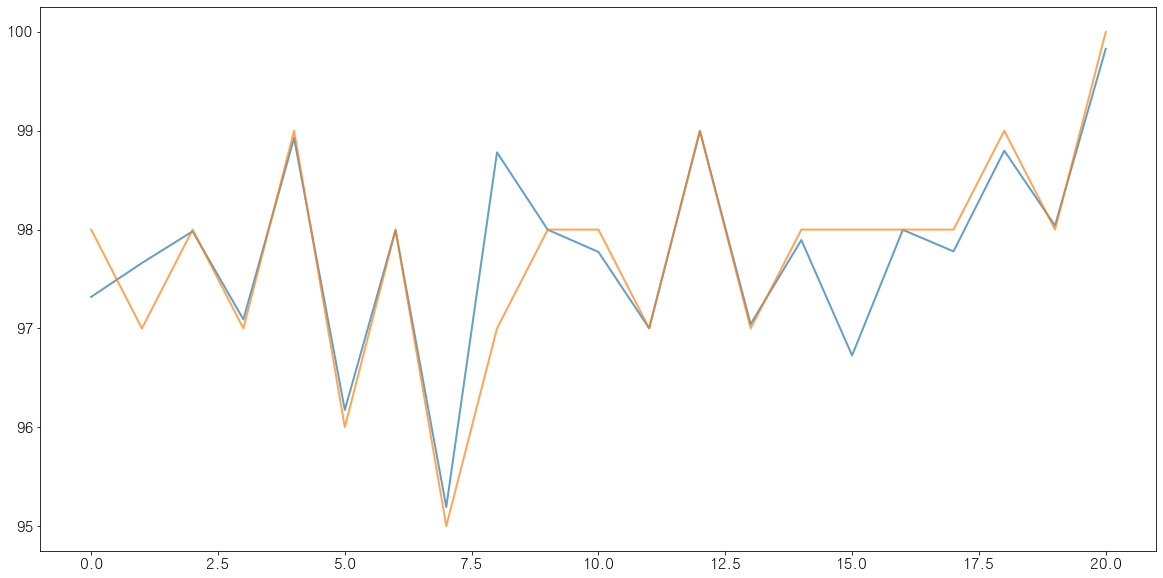

In [91]:
# 모델 성능 시각화

plt.pyplot.plot(model.predict(x_in),alpha = 0.7,linewidth = 2)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values,alpha = 0.7,linewidth = 2)

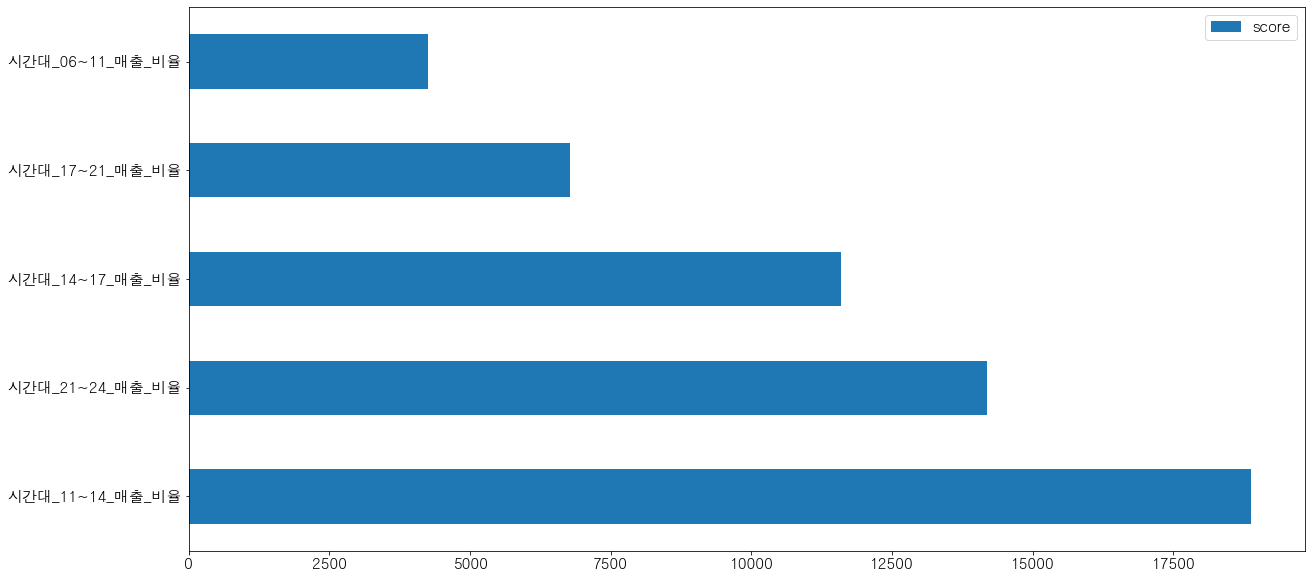

In [92]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 15
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')